# Enrichment
***
## Learning Objectives
- Understand the concept of enrichment
- Learn about joining dataframes
- Learn about the different types of joins
- Insert new data into a dataframe 
- Update existing data in a dataframe 
- Delete rows from a dataframe 

## Links

## Additional Material


## Sources
- [Difference between `concat` and `merge`](https://stackoverflow.com/questions/38256104/difference-between-pandas-merge-and-concat)
- [SQL Joins](https://www.w3schools.com/sql/sql_join.asp)
- [Indexes in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
- [Join in Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)
- [Merge and Join differences](https://g.co/bard/share/219948ee80d0)
- [Adding new data](https://g.co/bard/share/91a6e1839e86)
- [Deleting rows in a dataframe that don't exist in another dataframe](https://g.co/bard/share/c8fc62b9b166)

## Concat
`concat` is the simplest way to combine two `Series` or `DataFrame`s, but it only works if the two objects have the same index. In the following example, `animals` and `more_animals` have the same index, so we can concatenate them:

```python
>>> animals = pd.Series(['dog', 'cat', 'bird'], index=[1, 2, 3])
>>> more_animals = pd.Series(['fish', 'hamster'], index=[4, 5])
>>> pd.concat([animals, more_animals])
1        dog
2        cat
3       bird
4       fish
5    hamster
dtype: object
```
We haven't spoken about indexes in depth yet, but it's the numbers on the very left of the dataframe. In this case, the index is the same as the row number, but it doesn't have to be. We'll talk about indexes in more detail later. Here's the code above to run for yourself:

In [13]:
import pandas as pd
animals = pd.Series(['dog', 'cat', 'bird'], index=[1, 2, 3])
more_animals = pd.Series(['fish', 'hamster'], index=[4, 5])
pd.concat([animals, more_animals])

1        dog
2        cat
3       bird
4       fish
5    hamster
dtype: object

Can you see how the two series were combined? Here's another example:

In [14]:
import pandas as pd
# Create two DataFrames
data1 = {'Name': ['Alice', 'Bob'],
         'Age': [25, 30]}
data2 = {'Name': ['Charlie', 'David'],
         'Age': [35, 40]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Concatenate the two DataFrames vertically (along rows)
result = pd.concat([df1, df2], ignore_index=True)

# Print the result
print(result)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
3    David   40


`concat` and also be used to combine data horizontally. I.E. to put columns side by side. This is done by setting the `axis` parameter to `1`.


In [17]:
import pandas as pd

# Create two DataFrames
data1 = {'A': ['A0', 'A1', 'A2'],
         'B': ['B0', 'B1', 'B2']}
df1 = pd.DataFrame(data1)

data2 = {'C': ['C0', 'C1', 'C2'],
         'D': ['D0', 'D1', 'D2']}
df2 = pd.DataFrame(data2)

# Concatenate DataFrames horizontally
result = pd.concat([df1, df2], axis=1)

# Print the result
print(result)


    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2


`A` and `B` are columns in `data1` and `C` and `D` are columns in `data2`. The result is a new dataframe -`result`- with the columns `A`, `B`, `C`, `D`. 

`concat` should be used whenever you want to *stack* data on top of (or alongside) each other. 

`merge` should be used whenever you want to *combine* data based on a common column.


## Merge
Imagine you have two data frames: 

In [2]:


orders_data = {
    'order_id': [101, 102, 103, 104],
    'customer_id': ['A', 'B', 'A', 'C'],
    'order_total': [50, 75, 60, 90]
}

orders = pd.DataFrame(orders_data)
orders

,order_id,customer_id,order_total
0,101,A,50
1,102,B,75
2,103,A,60
3,104,C,90


And

In [3]:

# Sample customers DataFrame
customers_data = {
    'customer_id': ['A', 'B', 'C', 'D'],
    'customer_name': ['Alice', 'Bob', 'Charlie', 'David']
}
customers_df = pd.DataFrame(customers_data)
customers_df

,customer_id,customer_name
0,A,Alice
1,B,Bob
2,C,Charlie
3,D,David


Can you tell what's the common column in both these sets? It makes sense to combine them using the `customer_id` column. Let's do that using the `merge` function from `pandas`:

```python
merged = pd.merge(customers_df, orders, on='customer_id', how='inner')
```


In [4]:
merged = pd.merge(customers_df, orders, on='customer_id', how='inner')

print(merged)

  customer_id customer_name  order_id  order_total
0           A         Alice       101           50
1           A         Alice       103           60
2           B           Bob       102           75
3           C       Charlie       104           90


The two datasets are combined. The arguments for the `merge()` method are:
* `left`: the left DataFrame
* `right`: the right DataFrame
* `on`: the column(s) to join on. If not specified, and no other join keys given, will use the intersection of the column names in `left` and `right` as the join keys.
* `left_on`: the column(s) to use from the left DataFrame as the join key(s)
* `right_on`: the column(s) to use from the right DataFrame as the join key(s)
* `left_index`: if `True`, use the index (row labels) from the left DataFrame as its join key(s). If specified, `left_on` must be `None`.
* `right_index`: if `True`, use the index (row labels) from the right DataFrame as its join key(s). If specified, `right_on` must be `None`.
* `how`: the type of join to perform. Possible values are: `'left'`, `'right'`, `'outer'`, `'inner'`. Defaults to `'inner'`.
* `suffixes`: a tuple of strings to append to the column names of the overlapping columns in the left and right DataFrames, respectively. Defaults to `('_x', '_y')`.

For our purpose, we use `left`, `right`, `on`, and `how` arguments. We will use the `left` and `right` arguments to specify the DataFrames we want to join, the `on` argument to specify the column(s) to join on, and the `how` argument to specify the type of join to perform.

`on` is used to tell `merge()` which column(s) can be used to combine the datasets. Normally, the columns names are the same, but it doesn't need to be. Think of vlookup`s in a spreadsheet program - you're basically performing a join when you use vlookup. 

`how` is used to tell `merge()` what type of join to perform. The default is an inner join, which is what we want. An inner join will only keep rows where the join key(s) are present in both datasets. You get 4 types of joins: 
* Inner join: only keep rows where the join key(s) are present in both datasets

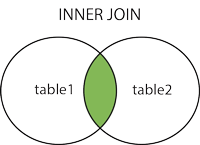

* Left join: keep all rows from the left dataset, and only keep rows from the right dataset where the join key(s) are present in both datasets

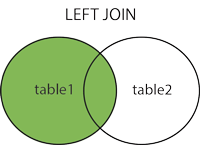

* Right join: keep all rows from the right dataset, and only keep rows from the left dataset where the join key(s) are present in both datasets

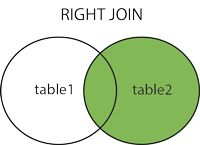

* Outer join: keep all rows from both datasets

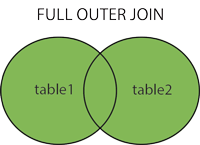

Here is a left join example:

In [5]:
import pandas as pd

# Sample orders DataFrame
orders_data = {
    'order_id': [101, 102, 103, 104],
    'customer_id': ['A', 'B', 'A', 'C'],
    'order_total': [50, 75, 60, 90]
}
orders_df = pd.DataFrame(orders_data)

# Sample customers DataFrame
customers_data = {
    'customer_id': ['A', 'B', 'C', 'D'],
    'customer_name': ['Alice', 'Bob', 'Charlie', 'David']
}
customers_df = pd.DataFrame(customers_data)

# Perform left join based on 'customer_id'
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

print(result_df)


   order_id customer_id  order_total customer_name
0       101           A           50         Alice
1       102           B           75           Bob
2       103           A           60         Alice
3       104           C           90       Charlie


We may want only the customers that have orders. Notice that `David` (or `customer_id` `D`) does not have an order. There are 4 rows in the `customers` dataframe and 3 in `order_data`. That is why the result of the merge is 3 rows. 

We can swap it around - asking for all customers - if they have a order or not - by using a `right join`:

In [6]:
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='right')

print(result_df)

   order_id customer_id  order_total customer_name
0     101.0           A         50.0         Alice
1     103.0           A         60.0         Alice
2     102.0           B         75.0           Bob
3     104.0           C         90.0       Charlie
4       NaN           D          NaN         David


Notice the last row. David has no orders. `order_id` and `order_total` is `NaN` - not a number. This is because David has no orders. 

`OUTER JOIN` is even less restrictive than `LEFT JOIN` or `RIGHT JOIN`. It will return all rows from both tables, even if there is no match. Using the same example as above, the result would look like this:

In [7]:
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='outer')

print(result_df)

   order_id customer_id  order_total customer_name
0     101.0           A         50.0         Alice
1     103.0           A         60.0         Alice
2     102.0           B         75.0           Bob
3     104.0           C         90.0       Charlie
4       NaN           D          NaN         David


Since there are no orders without customers, the result is the same as a right join. Imagine the the dataset had orders without customers, though: 

In [8]:
# Add an order to the data

# Create a new order
new_order = {
    'order_id': 105,

    'order_total': 120
}
# pd.concat([orders_df, pd.DataFrame([new_order])], ignore_index=True)
# orders_df = orders_df.append(new_order, ignore_index=True)
# concat instead of append
#
orders_df = pd.concat([orders_df, pd.DataFrame([new_order])], ignore_index=True)
orders_df

,order_id,customer_id,order_total
0,101,A,50
1,102,B,75
2,103,A,60
3,104,C,90
4,105,NaN,120


Join the datasets again: 

In [9]:
result_df = pd.merge(orders_df, customers_df, on='customer_id', how='outer')

print(result_df)

   order_id customer_id  order_total customer_name
0     101.0           A         50.0         Alice
1     103.0           A         60.0         Alice
2     102.0           B         75.0           Bob
3     104.0           C         90.0       Charlie
4     105.0         NaN        120.0           NaN
5       NaN           D          NaN         David


Now we see 5 rows. `order_id` `5` has no `customer_name`

## Join
Why was the previous section called **MERGE** - because there is also a **JOIN**. The difference is that **MERGE** is used to combine dataframes based on the index, while **JOIN** is used to combine dataframes based on the columns.



In [10]:
import pandas as pd

# Create the first DataFrame
df1 = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [4, 5, 6, 7, 8]})

# Create the second DataFrame
df2 = pd.DataFrame({'A': [2, 4, 6, 8], 'B': [5, 7, 9, 10]})

# Join the two DataFrames on the A column
df_joined = df1.join(df2, on='A')

# Print the DataFrame
print(df_joined)


ValueError: columns overlap but no suffix specified: Index(['A', 'B'], dtype='object')

## Adding new rows 
You frequently need to add new rows to existing data. Pandas has several methods that achieves this task. Here is `concat()`:

In [10]:

# Create a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35]}
df = pd.DataFrame(data)

# Create a new DataFrame with the new row

new_row = pd.DataFrame({'Name': ['David'], 'Age': [40]})

# Use the concat function to concatenate the DataFrames
df = pd.concat([df, new_row], ignore_index=True)

# Print the updated DataFrame
print(df)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
3    David   40


In the code above, we added one row to the `data` dataframe but, more often, you'll add multiple rows to existing data: 

In [11]:
import pandas as pd

# Create a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35]}
df = pd.DataFrame(data)

# Create a new DataFrame with multiple new rows
new_data = {'Name': ['David', 'Eva'],
            'Age': [40, 28]}
new_rows = pd.DataFrame(new_data)

# Use the concat function to concatenate the DataFrames
df = pd.concat([df, new_rows], ignore_index=True)

# Print the updated DataFrame
print(df)


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
3    David   40
4      Eva   28


The syntax is the same. 

## Update existing data
Inserting new and updating existing data are tasks that are frequently performed together. To update existing data, you can use the `merge()` function shown earlier:

In [12]:
# Sample DataFrames
# Create the original DataFrame
data = {'ID': [1, 2, 3, 4],
        'Value': ['A', 'B', 'C', 'D']}
df_original = pd.DataFrame(data)

# Create a DataFrame with updated values
updated_data = {'ID': [2, 4],
                'Value': ['X', 'Y']}
df_updated = pd.DataFrame(updated_data)

# Merge the original DataFrame with the updated DataFrame based on 'ID'
merged_df = df_original.merge(df_updated, on='ID', how='left', suffixes=('_original', '_updated'))

print(merged_df)

   ID Value_original Value_updated
0   1              A           NaN
1   2              B             X
2   3              C           NaN
3   4              D             Y


Notice the `suffixes`  argument. It's used to give unique names to the two dataframes. `Value` has the same column name in both datasets. In the dataframe, it's been renamed to `Value_left` and `Value_right` respectively. 

In [13]:
# Update the original DataFrame with values from the merged DataFrame
df_original['Value'] = merged_df['Value_updated'].fillna(merged_df['Value_original'])

# Print the updated DataFrame
print(df_original)


   ID Value
0   1     A
1   2     X
2   3     C
3   4     Y


To update the original dataframe, replace the column that you want to update - `Value` - in `df_original` with `Value_updated` in merged_df. 

```python 
df_original['Value'] = merged_df['Value_updated']
```

Where `ID`s don't match, i.e. existing rows that don't need to be updated, use original values in `merged_df`: 
```python
.fillna(merged_df['Value_original'])
```

When complete, the dataframe is updated: 

In [14]:
print(df_original)

   ID Value
0   1     A
1   2     X
2   3     C
3   4     Y


## Removing data

An operation that goes hand-in-hand with adding and updating data is removing data. In this section, we will learn how to remove data from a dataframe.


In [5]:
# Create the first DataFrame
df1 = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [4, 5, 6, 7, 8]})
df1

,A,B
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [8]:
# Create the second DataFrame
df2 = pd.DataFrame({'A': [2, 4, 6, 8], 'B': [5, 7, 9, 10]})

df2


,A,B
0,2,5
1,4,7
2,6,9
3,8,10


Notice that row 3 - `8	10` - is not in `df1`. 

In [9]:
# Find the rows that exist in df1 but not in df2
df_diff = df1[~df1.isin(df2)]

# Print the DataFrame
print(df_diff)

   A  B
0  1  4
1  2  5
2  3  6
3  4  7
4  5  8


The `~` sign means NOT. So, the code `[~df1.isin(df2)]` reads - "give me all the rows in `df1` that are not in `df2`". This pattern can be used to remove rows from a dataframe that are in another dataframe.